# OLA 2
## By group H (Caroline, Micheal og Maria)

## Task

In [21]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

### Selecting and preparing a dataset
We have decided to work on a dataset on crop recommendation. 

We want to create a model that can take information of a field and output which crop would be best to plant on that field.

TODO..

In [2]:
crops = pd.read_csv('datasets/Crop_recommendation.csv')

#### Check for missing data

In [3]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


There are two unnamed columns containing no data, so we'll remove those. Other than that, there are no missing values in the dataset.

In [4]:
crops = crops.dropna(axis=1, how='all')

Bla bla 'label' is object, so let's look at what it is:

In [5]:
crops['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

#### Check for duplicates

In [14]:
duplicates = crops.duplicated()
crops[duplicates]

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label


There are no duplicates in the dataset.

#### Understand the data

In [6]:
crops.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


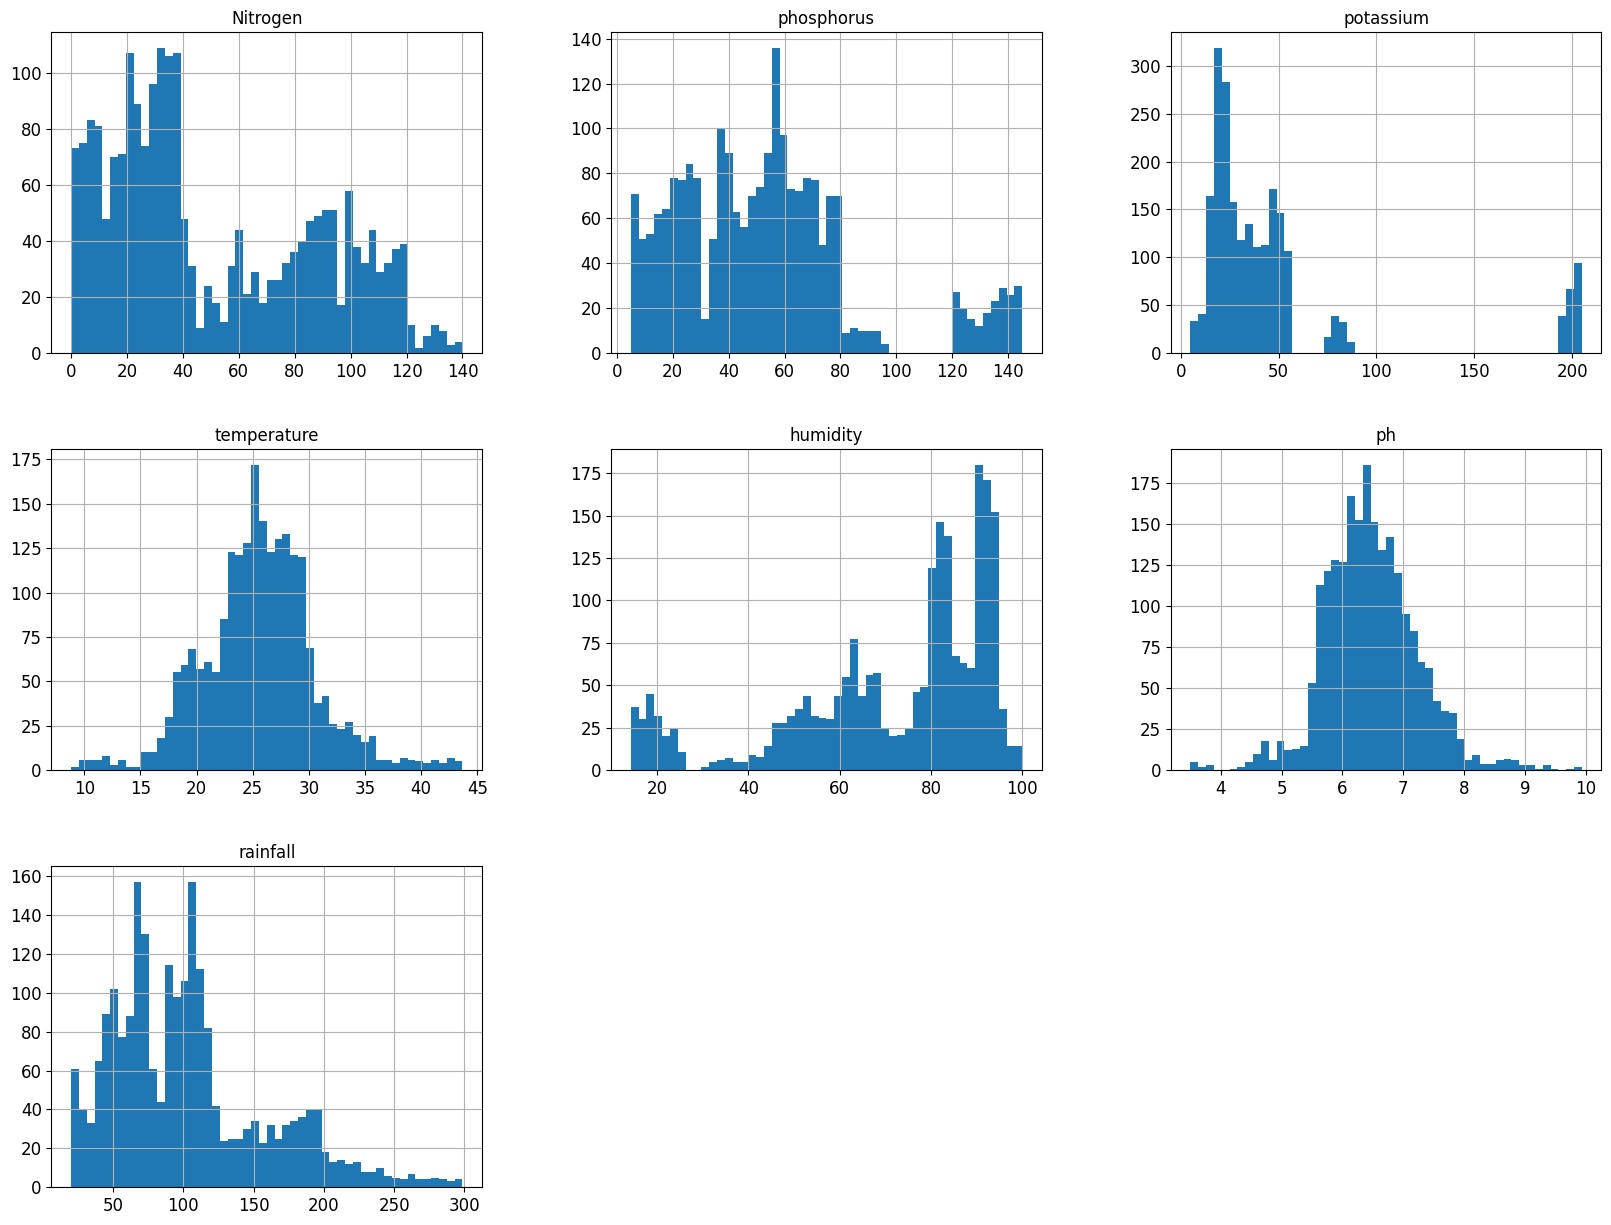

In [7]:
crops.hist(bins=50, figsize=(20,15))
plt.show()

Looking at the histograms of the different attributes ... 
temperature and ph have more bell-shaped distributions, while the other attributes have skewed distributions. Most of which are somewhat *tail-heavy*, except for `humidity`, which is more *peak-heavy*. TODO

#### Check for outliers
On the histograms, it was quite obvious that there were some outliers within the `potassium` attribute. TODO

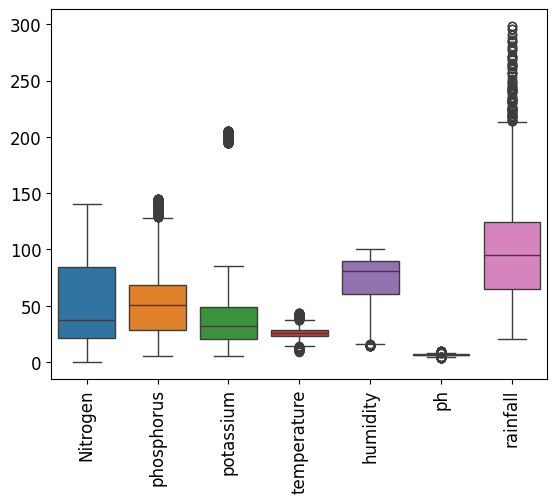

In [22]:
sns.boxplot(data=crops)
plt.xticks(rotation=90)
plt.show()

Rain interesting, in India, bla bla

### Splitting into training and test sets
We'll try different ways of splitting on different models:

#### Split 1
With one-hot encoding on label and linear regression:

In [44]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(crops, test_size=0.2, random_state=42)

In [64]:
crops_train = train_set.copy()
crops_labels = train_set['label'].copy()

In [55]:
from sklearn.preprocessing import OneHotEncoder

crops_cat = crops_train[['label']]

crops_encoder = OneHotEncoder()
crops_cat_1hot = crops_encoder.fit_transform(crops_cat)
crops_cat_1hot

<1760x22 sparse matrix of type '<class 'numpy.float64'>'
	with 1760 stored elements in Compressed Sparse Row format>

In [56]:
crops_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
crops_encoder.categories_

[array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)]

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [63]:
from sklearn.compose import ColumnTransformer

crops_num = crops_train.drop('label', axis=1)
num_attribs = list(crops_num)
cat_attribs = ['label']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), 
        ("cat", OneHotEncoder(), cat_attribs),
    ])

crops_prepared = full_pipeline.fit_transform(crops_train)
crops_prepared

<1760x29 sparse matrix of type '<class 'numpy.float64'>'
	with 14080 stored elements in Compressed Sparse Row format>

In [73]:
from sklearn.linear_model import LinearRegression

crops_train_labels = pd.DataFrame(crops_cat_1hot.todense())

lin_reg = LinearRegression()
lin_reg.fit(crops_prepared, crops_train_labels)

LinearRegression()

In [74]:
some_data = crops_train.iloc[:5]
some_labels = crops_train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [[-4.21730568e-07  1.04949296e-06 -2.74129141e-06  1.57576181e-07
  -1.77357309e-07  9.59522561e-07 -3.55694856e-07  2.80477682e-07
  -6.03692400e-07 -1.21766139e-06  1.43093989e-07 -9.27587039e-07
   1.32417442e-06 -1.57318300e-07 -9.65718708e-07  9.70939291e-07
   1.00000001e+00 -1.86910425e-06  7.83288431e-08  9.37586800e-08
  -1.90928088e-06 -2.08656832e-07]
 [-1.65335514e-06 -1.49518458e-06  9.99999999e-01  3.13048307e-07
   3.67834437e-07 -3.57804025e-06  4.75301822e-07 -2.52661880e-07
   1.39232708e-06 -7.59619335e-07 -6.70641038e-08  8.94384133e-07
  -5.74773742e-07 -2.28581298e-07 -1.09896231e-06 -4.11957382e-08
  -1.92121349e-07  9.55364235e-07  8.84742337e-07  2.75089273e-08
  -2.84863901e-07  8.28611807e-07]
 [ 5.39869453e-08  3.70722964e-07 -3.11185589e-07  6.51895530e-08
  -9.61731385e-08  2.01681291e-07 -9.56503598e-08  7.01799192e-08
  -1.48863562e-09 -3.54941491e-07  9.99999999e-01 -1.37846234e-07
   1.24046336e-07  3.03980747e-08  2.24244470e-07  5.877603

In [75]:
print("Labels:", list(some_labels))

Labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [77]:
from sklearn.metrics import mean_squared_error

crops_predictions = lin_reg.predict(crops_prepared)
lin_mse = mean_squared_error(crops_train_labels, crops_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.090651532641852e-06

#### Split 2
without one-hot encoding:

Our feature data/input variables for training our model will be all columns but `label`, which will be the corresponding target data/output variable that our model should learn to predict.

In [23]:
X = crops.iloc[:, :-1].values 
y = crops.iloc[:, -1].values 

In [10]:
from sklearn.model_selection import train_test_split

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)

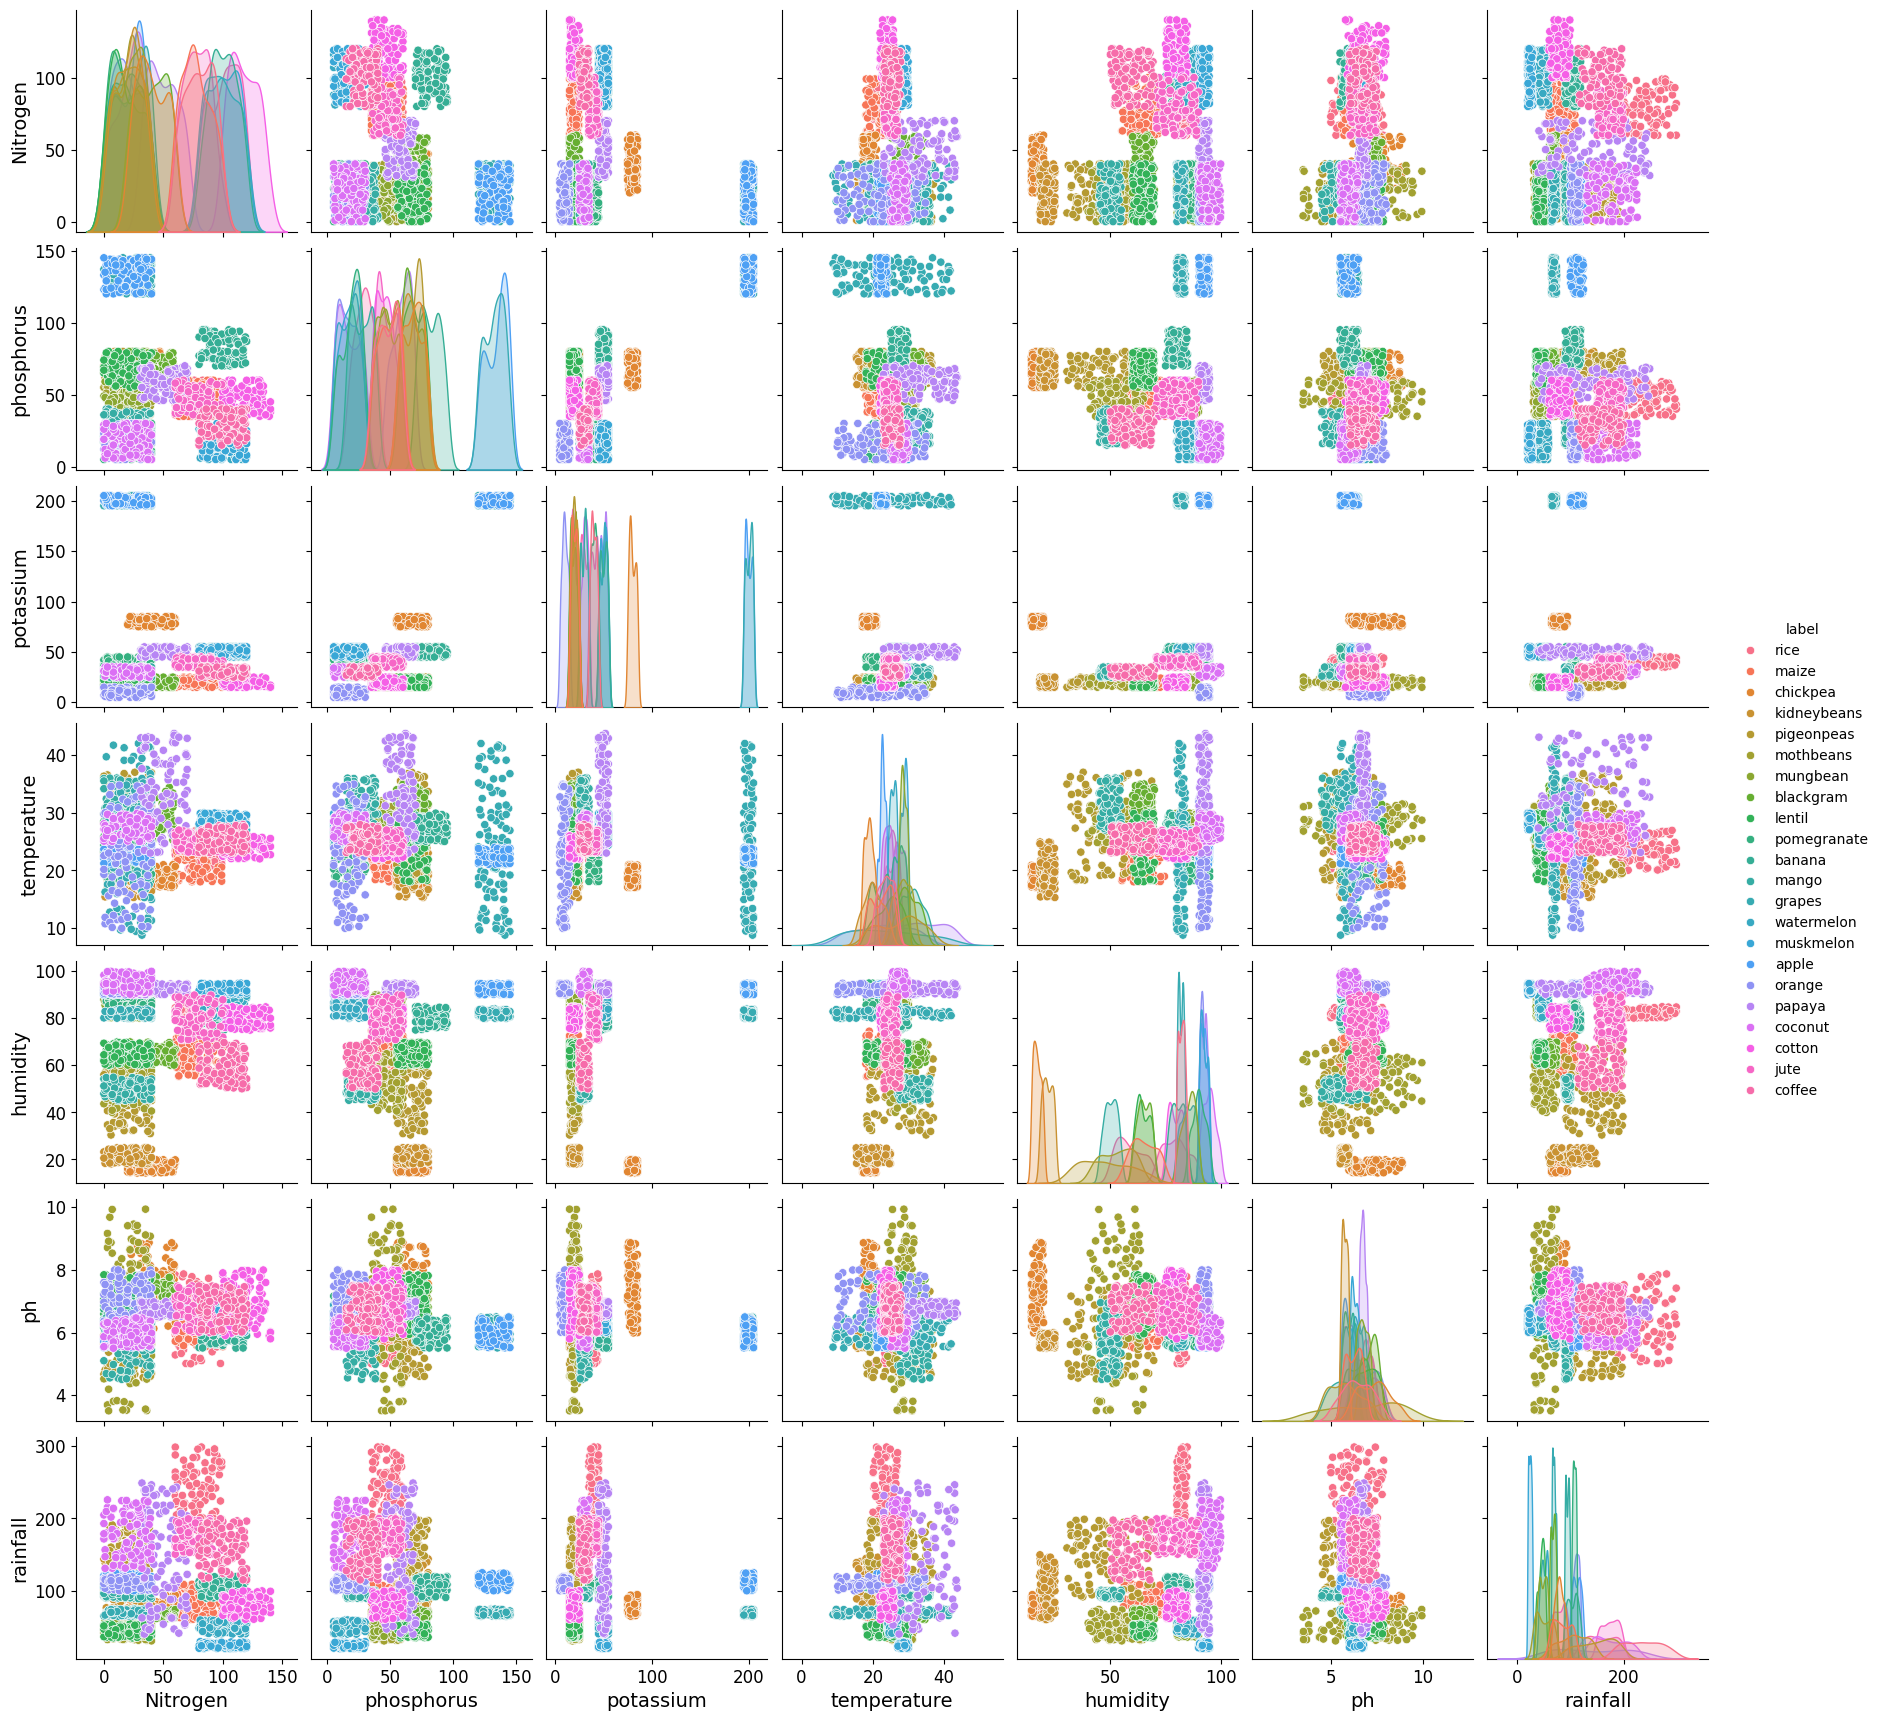

In [31]:
sns.pairplot(crops,hue = 'label')
plt.show()

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler